## VISTA: Vehicle Image Sensing for Traffic Automation

## Running PyTorch on GPU
Some great YouTube resources to make sure you can run code on your GPU:

- [<u>Tutorial 33- Installing Cuda Toolkit And cuDNN For Deep Learning</u> (**THIS IS A PREREQUISITE FOR THE NEXT VIDEO**)](https://www.youtube.com/watch?v=StH5YNrY0mE)
- [<u>Pytorch Tutorial 6- How To Run Pytorch Code In GPU Using CUDA Library</u>](https://www.youtube.com/watch?v=K8qs9GlE4UQ)

Your PyTorch build should be done with the correct cudatoolkit version. More info on [<u>PyTorch's official website</u>](https://pytorch.org/get-started/locally/).

#### Difference of `nvidia-smi` and `nvcc -V`
The `!nvidia-smi` and `!nvcc -V` returned CUDA versions do not have the match.

The CUDA Version returned in `!nvidia-smi` in my case is 12.4, which means 12.4 is the maximum CUDA version my current NVIDIA-SMI driver (System Management Interface driver) can support. In this case my NVIDIA-SMI driver version is 551.61.

The CUDA version returned in `!nvcc -V` tells you the version of the NVidia Cuda Complier driver (nvcc driver). Which in my case is cuda_11.8. Which means my SMI will be able to support the nvcc. Both are required to be able to run code on the graphics card.


#### Additional info on difference of `nvidia-smi` and `nvcc -V` in [<u>THIS ARTICLE</u>](https://stackoverflow.com/questions/53422407/different-cuda-versions-shown-by-nvcc-and-nvidia-smi)

The discrepancy between the CUDA versions reported by `nvcc --version` and `nvidia-smi` is due to the fact that they report different aspects of your system's CUDA setup.

- `nvcc --version` reports the version of the CUDA toolkit you have installed. This is the version that is used to compile CUDA code.
- `nvidia-smi`, on the other hand, reports the maximum CUDA version that your GPU driver supports.
In your case, `nvcc --version` is reporting CUDA 10.1 because that's the version of the CUDA toolkit you have installed. `nvidia-smi` is reporting a different version because your GPU driver can support up to that CUDA version.

When you run a CUDA program, the CUDA version that gets used is determined by the version of the CUDA toolkit that was used to compile the program. However, the CUDA version used by the program must also be supported by your GPU driver. If your GPU driver does not support the CUDA version used by the program, you will encounter errors.



In [1]:
!nvidia-smi

Mon Apr 29 09:24:10 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   35C    P0             N/A / ERR!  |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
!where python

C:\Users\Borna\miniconda3\python.exe


### Why to use `r` in `r"users\some\string"` or `rf` inr `rf"users\some\string"`
In Python, backslashes (`\`) in strings are used to introduce special escape sequences like newline (`\n`), tab (`\t`), or Unicode characters. When you use a backslash in a string literal without it being part of a recognized escape sequence, Python issues a warning because it's likely you intended to either specify an actual escape sequence or use a raw string.

In your case, `\B` in the string `f"{HOME}\ByteTrack"` is not a recognized escape sequence, hence the warning. The interpreter is warning you that in future versions of Python, this could result in a `SyntaxError` if not corrected.

To resolve this, you should do one of the following:

1. **Double the Backslashes**: This tells Python to treat them as literal backslashes.

    `f"{HOME}\\ByteTrack"`

2. **Use Raw String Literals**: Prefix the string with `r` to tell Python to treat backslashes as literal characters without any special meaning. 

    `rf"{HOME}\ByteTrack"`
   

The `rf` prefix stands for "raw f-string", which combines raw strings with f-strings, allowing you to use both raw string literals and string interpolation (inserting variables into strings).

After making either change, Python will correctly interpret the backslashes as you intended, and you shouldn't see the syntax warning.

## Helper Functions

### Function to throw out frames leading to faster analysis

In [2]:
import cv2
import os
from tqdm.notebook import tqdm

def keep_one_per_every_n_frames(SOURCE_VIDEO_PATH, n):
    # Open the input video file
    video = cv2.VideoCapture(SOURCE_VIDEO_PATH)
    
    # Get the total number of frames in the video
    total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)

    # output file name and path creation based on the SOURCE_VIDEO_PATH and n
    splitted_path = temp.split("\\")
    l = len(splitted_path)
    full_path = '\\'.join(splitted_path[0:(l-1)])
    full_video_name = splitted_path[l-1].split(".")
    video_name = full_video_name[0]
    video_type = full_video_name[1]
    output_file = full_path + '\\' + video_name + '_'
    output_file = f'{full_path}\\{video_name}_{n}x_speed.{video_type}'

    
    # Create a new video file to store the output
    output_video = cv2.VideoWriter(output_file, 
                                   cv2.VideoWriter_fourcc(*'mp4v'), 
                                   video.get(cv2.CAP_PROP_FPS), 
                                   (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))))
    
    # Iterate over the frames of the input video
    frame_count = 0
    progress_bar = iter(tqdm(range(int(total_frames))))
    while frame_count < total_frames:
        # Read the next frame
        ret, frame = video.read()
    
        # If the frame is not empty, write it to the output video
        if ret:
            if frame_count % n == 0:
                output_video.write(frame)
    
        # Increment the frame count
        frame_count += 1
        next(progress_bar)
    
    progress_bar.close()
    
    # Release the video capture and output video objects
    video.release()
    output_video.release()
    
    # Close all windows
    cv2.destroyAllWindows()

### Function to increase the fps

In [3]:
# this function increases the fps rate, but the total number of frames for the entire video will remain the same
# therefore, there is no effect on increasing the analysis time for object detection and labeling
# this is mostly useful for making an already labeled video faster by increasing the fps by 2-3 times observing any issues with the final production
# n could be an integer or decimal. 0.5 would make the video slower by half the speed

def increase_video_fps(SOURCE_VIDEO_PATH, n): 
    # Open the input video file
    cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

    # Get the fps rate
    fps = cap.get(cv2.CAP_PROP_FPS)

    # output file name and path creation based on the SOURCE_VIDEO_PATH and n
    splitted_path = temp.split("\\")
    l = len(splitted_path)
    full_path = '\\'.join(splitted_path[0:(l-1)])
    full_video_name = splitted_path[l-1].split(".")
    video_name = full_video_name[0]
    video_type = full_video_name[1]
    output_file = full_path + '\\' + video_name + '_'
    output_file = f'{full_path}\\{video_name}_{n}x_fps.{video_type}'

    # assign the output fps
    output_fps = fps * n
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, output_fps, (int(cap.get(3)), int(cap.get(4))))

    # Get the total number of frames in the video
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    progress_bar = iter(tqdm(range(int(total_frames))))
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)

        # Increment the frame count
        next(progress_bar)
        
    progress_bar.close()
        
    cap.release()
    out.release()
    cv2.destroyAllWindows()

### Convert file types (e.g., WMV to mp4)

In [4]:
# import moviepy.editor as mp
# clip = mp.VideoFileClip(r"C:\Users\Borna\Desktop\Vista\data\VillageOfTilton\VillageOfTilton.wmv")
# clip.write_videofile(r"C:\Users\Borna\Desktop\Vista\data\VillageOfTilton\VillageOfTilton.mp4")
# clip.write_videofile(r"C:\Users\Borna\Desktop\Vista\data\VillageOfTilton\VillageOfTilton.mp4", codec='h264_nvenc')

### First time installations

In [5]:
import os
HOME = os.getcwd()
print(HOME)

#############  Ultralytics ############
# !pip install ultralytics

#############  Supervision ############
# !pip install supervision==0.1.0

#############   ByteTrack  ############
# %cd {HOME}
# !git clone https://github.com/ifzhang/ByteTrack.git
# %cd {HOME}/ByteTrack

# # # workaround related to https://github.com/roboflow/notebooks/issues/80
# # !sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

# # for windows, sed (stream editor) doesn't work. There is a one-liner for it inside powershell. 
# # !powershell -command "...." writes the comment
# !powershell -command "pwd"
# !powershell -command "(Get-Content requirements.txt) -replace 'onnx==1.8.1', 'onnx==1.9.0' | Set-Content requirements.txt"

# # the `-q` is for quiet install. 
# !pip3 install -q -r requirements.txt
# !python3 setup.py -q develop
# !pip install -q cython_bbox
# !pip install -q onemetric
# # workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
# !pip install -q loguru lap thop


# # the onnx libraries ins requirements don't get install with the specific version.
# # you just have to manually do:
# # !pip install onnx
# # !pip install onnxruntime
# # !pip install onnx-simplifier

# # here I have done it without the `-q`
# !pip3 install -r requirements.txt

# # # While `python3 setup.py develop` is still used, the Python Packaging Authority (PyPA) 
# # # now recommends using pip install -e . for installing packages in editable/development 
# # # mode. This newer approach offers better integration with the broader Python 
# # # packaging ecosystem, including dependency resolution.
# # !python3 setup.py develop
# # !pip install -e 
# !pip install cython_bbox
# !pip install onemetric

# # workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
# !pip install loguru lap thop

# # use pip install lapx instead of lap (got stuck on this for 1 hour!!!)

############# END ############

## from IPython import display
## display.clear_output()

C:\Users\Borna\Desktop\VISTA


### Package Imports

In [6]:
# import ByteTrack
import sys
sys.path.append(rf"{HOME}\ByteTrack")
print(sys.executable)

import yolox
print("yolox.__version__:", yolox.__version__)

from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False
    
# import ultralytics
from ultralytics import YOLO

# import supervision
import supervision
print("supervision.__version__:", supervision.__version__)

# supervision modules for version 0.1.0
from supervision.draw.color import ColorPalette
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.video.sink import VideoSink
from supervision.video.dataclasses import VideoInfo
from supervision.geometry.dataclasses import Point
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator
from tqdm.notebook import tqdm

C:\Users\Borna\miniconda3\envs\vistagpuenv\python.exe


C:\Users\Borna\miniconda3\envs\vistagpuenv\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


yolox.__version__: 0.1.0
supervision.__version__: 0.1.0


In [9]:
# # for checking if CUDA is available on torch
# import torch
# print(torch.cuda.is_available())
# print(torch.cuda.get_arch_list())
# print(torch.cuda.current_device())


# # also to check if it is available in ultralytics
# from ultralytics.utils import ASSETS, WEIGHTS_DIR, checks
# checks.cuda_is_available()

### Model Selection (Yolov8)

In [7]:
# settings
MODEL = "yolov8x.pt"

model = YOLO(MODEL)
model.fuse()
model = model.cuda()

YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


### File Paths

In [8]:
# SOURCE_VIDEO_PATH = r"D:\Union Gap - Longfibre Rd TMCs-20240401T180323Z-001\LONGFIBRE 03\Standard_SCU2YD_2024-03-26_1600.001.mp4"
SOURCE_VIDEO_PATH = r"C:\Users\Borna\Desktop\VISTA\data\VillageOfTilton\VillageOfTilton.mp4"
# SOURCE_VIDEO_PATH = r"C:\Users\Borna\Desktop\VISTA\data\vehicle-counting.mp4"
# SOURCE_VIDEO_PATH = r"C:\Users\Borna\Desktop\VISTA\data\traffic_analysis.mov"

TARGET_VIDEO_PATH = rf"{SOURCE_VIDEO_PATH.split(".")[0]}_Labeled.{SOURCE_VIDEO_PATH.split(".")[1]}"

# Print the paths:
print(SOURCE_VIDEO_PATH)
print(TARGET_VIDEO_PATH)

C:\Users\Borna\Desktop\VISTA\data\VillageOfTilton\VillageOfTilton.mp4
C:\Users\Borna\Desktop\VISTA\data\VillageOfTilton\VillageOfTilton_Labeled.mp4


## Single frame object detection


0: 384x640 3 cars, 1 truck, 2 traffic lights, 128.7ms
Speed: 5.0ms preprocess, 128.7ms inference, 101.7ms postprocess per image at shape (1, 3, 384, 640)


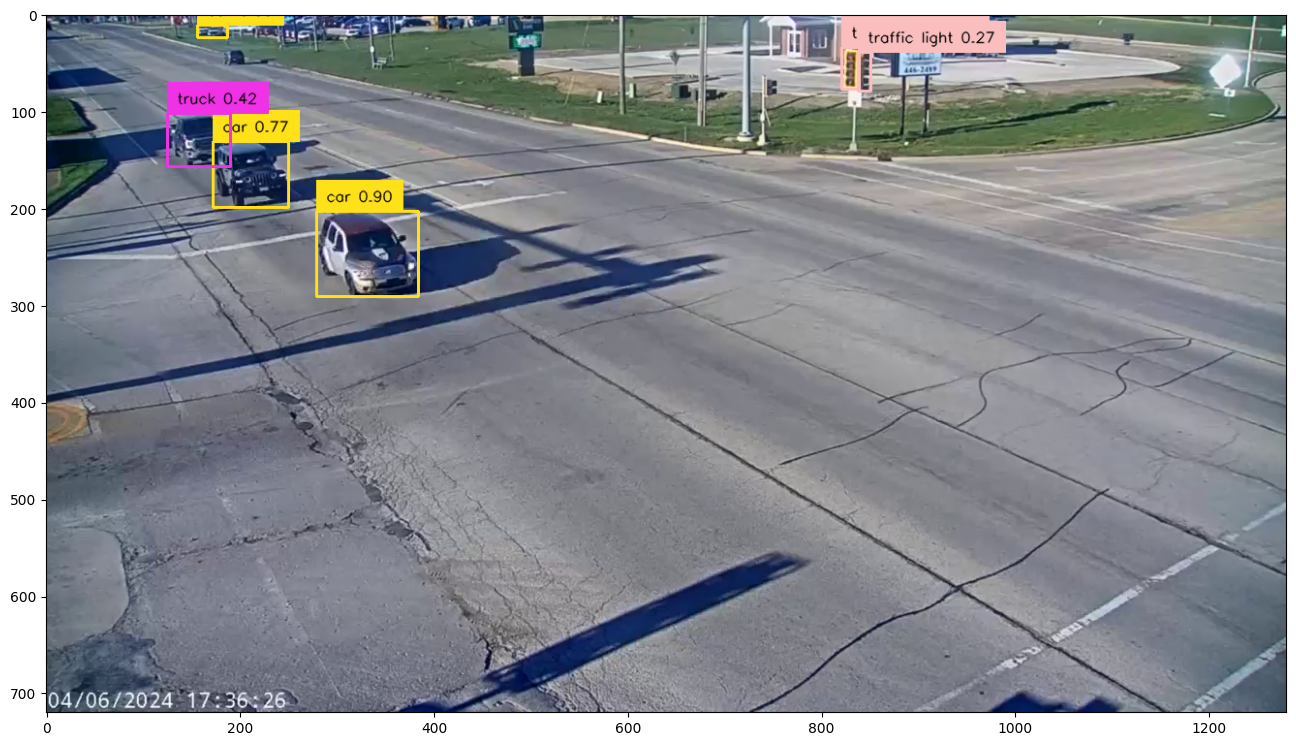

In [9]:
CLASS_NAMES_DICT = model.model.names

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=1, text_scale=.5)
# create an iterator on the generator
iterator = iter(generator)
frame = next(iterator)

# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]

# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

# print(type(results))
# print(results.boxes.xyxy)
# print(results.boxes.cls)
# print(type(frame))

## For video

In [10]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=20, total_frames=827)

In [20]:
CLASS_NAMES_DICT = model.model.names

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
# box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=0.4)
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)

video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
i = 0
# tqdm to show the loading process
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        # format custom labels
        labels = [
            f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]

        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

        sink.write_frame(frame)
        i = i + 1
        if (i > 828):
            break

  0%|          | 0/538 [00:00<?, ?it/s]


0: 384x640 3 cars, 1 truck, 229.8ms
Speed: 6.0ms preprocess, 229.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 123.6ms
Speed: 5.3ms preprocess, 123.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 2 trucks, 116.7ms
Speed: 4.0ms preprocess, 116.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 116.7ms
Speed: 2.0ms preprocess, 116.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 116.1ms
Speed: 2.0ms preprocess, 116.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 115.0ms
Speed: 2.0ms preprocess, 115.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 118.0ms
Speed: 2.0ms preprocess, 118.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 118.9ms
Speed: 3.0ms prep

In [69]:
increase_video_fps(TARGET_VIDEO_PATH)

  0%|          | 0/827 [00:00<?, ?it/s]

In [70]:
keep_one_per_every_n_frames(TARGET_VIDEO_PATH)

  0%|          | 0/827 [00:00<?, ?it/s]

## Video with ByteTrack

In [21]:
from typing import List
import numpy as np

# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [22]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [2, 3, 5, 7]

In [25]:
# original video from YouTube uses these coordinates
LINE_START_1 = Point(50, 1500)
LINE_END_1 = Point(3840-50, 1500)

# LINE_START_1 = Point(50, 210)
# LINE_END_1 = Point(430, 145)

# LINE_START_2 = Point(475, 135)
# LINE_END_2 = Point(610, 120)

# LINE_START_1 = Point(470, 100)
# LINE_END_1 = Point(60, 150)

# LINE_START_2 = Point(200, 300)
# LINE_END_2 = Point(400, 550)

# LINE_START_3 = Point(600, 450)
# LINE_END_3 = Point(1100, 280)

# LINE_START_4 = Point(1200, 235)
# LINE_END_4 = Point(840, 150)

# TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result.mp4"

In [77]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=19, total_frames=1390)

In [26]:
CLASS_NAMES_DICT = model.model.names

# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())

# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)

# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=1, text_thickness=1, text_scale=0.4)
line_annotator = LineCounterAnnotator(thickness=1, text_thickness=1, text_scale=0.4)

# create LineCounter instance
line_counter_1 = LineCounter(start=LINE_START_1, end=LINE_END_1)
# line_counter_2 = LineCounter(start=LINE_START_2, end=LINE_END_2)
# line_counter_3 = LineCounter(start=LINE_START_3, end=LINE_END_3)
# line_counter_4 = LineCounter(start=LINE_START_4, end=LINE_END_4)

video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
i = 0
# tqdm to show the loading process
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)

        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )

        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)

        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)

        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter_1.update(detections=detections)
        # line_counter_2.update(detections=detections)
        # line_counter_3.update(detections=detections)
        # line_counter_4.update(detections=detections)
        
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter_1)
        # line_annotator.annotate(frame=frame, line_counter=line_counter_2)
        # line_annotator.annotate(frame=frame, line_counter=line_counter_3)
        # line_annotator.annotate(frame=frame, line_counter=line_counter_4)

        sink.write_frame(frame)
        i = i + 1
        if (i > 650):
            break

  0%|          | 0/538 [00:00<?, ?it/s]


0: 384x640 3 cars, 1 truck, 298.0ms
Speed: 4.0ms preprocess, 298.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 122.2ms
Speed: 3.1ms preprocess, 122.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 2 trucks, 119.3ms
Speed: 2.0ms preprocess, 119.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 115.6ms
Speed: 3.0ms preprocess, 115.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 116.2ms
Speed: 2.0ms preprocess, 116.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 117.7ms
Speed: 4.0ms preprocess, 117.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 118.8ms
Speed: 5.0ms preprocess, 118.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 116.7ms
Speed: 2.0ms prep